# Gyroscope DDPG reward function testing (spinup library)

In [1]:
import gym
from gym import spaces
from gym.utils import seeding
import numpy as np
from os import path
from scipy.integrate import solve_ivp
import pandas as pd

import gym_gyroscope_env
import spinup
import torch
from functools import partial

from custom_functions.custom_functions import env_fn 
from custom_functions.custom_functions import create_env
from custom_functions.custom_functions import load_agent
from custom_functions.custom_functions import test_agent
from custom_functions.custom_functions import plot_test
from custom_functions.custom_functions import evaluate_control
from custom_functions.custom_functions import read_progress

import random
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

## Plot rewards

baseline_not_robust 5000
baseline_robust 2000
reward_01 2000
reward_02 2000
reward_03 2000
reward_04 2000


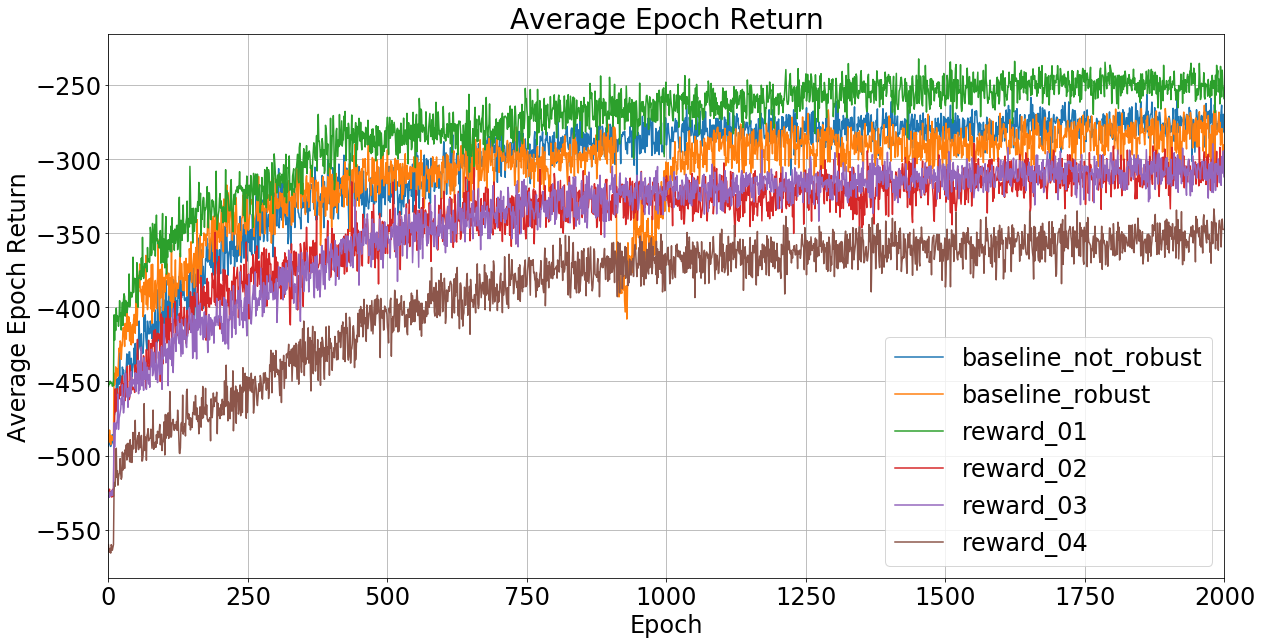

In [2]:
plt.figure(figsize=(20,10))
plt.title('Average Epoch Return',fontsize=28)
plt.xlabel('Epoch',fontsize=24)
plt.xticks(fontsize=24)
plt.ylabel('Average Epoch Return',fontsize=24)
plt.yticks(fontsize=24)
plt.grid()

agent_paths = ['baseline_not_robust','baseline_robust','reward_01','reward_02','reward_03','reward_04']

for agent_path in agent_paths:
    progress = read_progress(agent_path)
    print(agent_path, len(progress))
    plt.plot(np.arange(progress.shape[0]), progress[:,1])
#     plt.fill_between(np.arange(progress.shape[0]), progress[:,3], progress[:,4], alpha=0.5)
#     plt.fill_between(np.arange(progress.shape[0]), progress[:,1]+progress[:,2], progress[:,1]-progress[:,2], alpha=0.5)

plt.xlim([0,2000])
# plt.ylim([-2000,0])
plt.legend(agent_paths,fontsize=24)

baseline_robust 69.98967438974996
reward_01 62.29524764685466
reward_02 70.51085403849328
reward_03 69.50762267301177
reward_04 69.1905019830739


(0, 200)

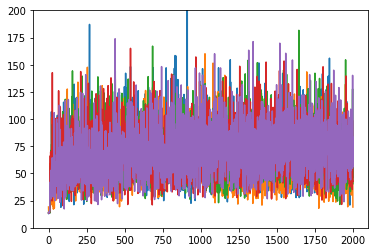

In [3]:
for i in range(1,6):
    progress = read_progress(agent_paths[i])
    plt.plot(np.arange(progress.shape[0]-1), progress[1:,-1]-progress[:-1,-1])
    print(agent_paths[i], np.mean(progress[1:,-1]-progress[:-1,-1]))
plt.ylim([0,200])

## Test an agent

[ -1.7098237   8.771828    0.6281286  -5.7892337  -1.7168678   2.232226
 -21.409475 ]


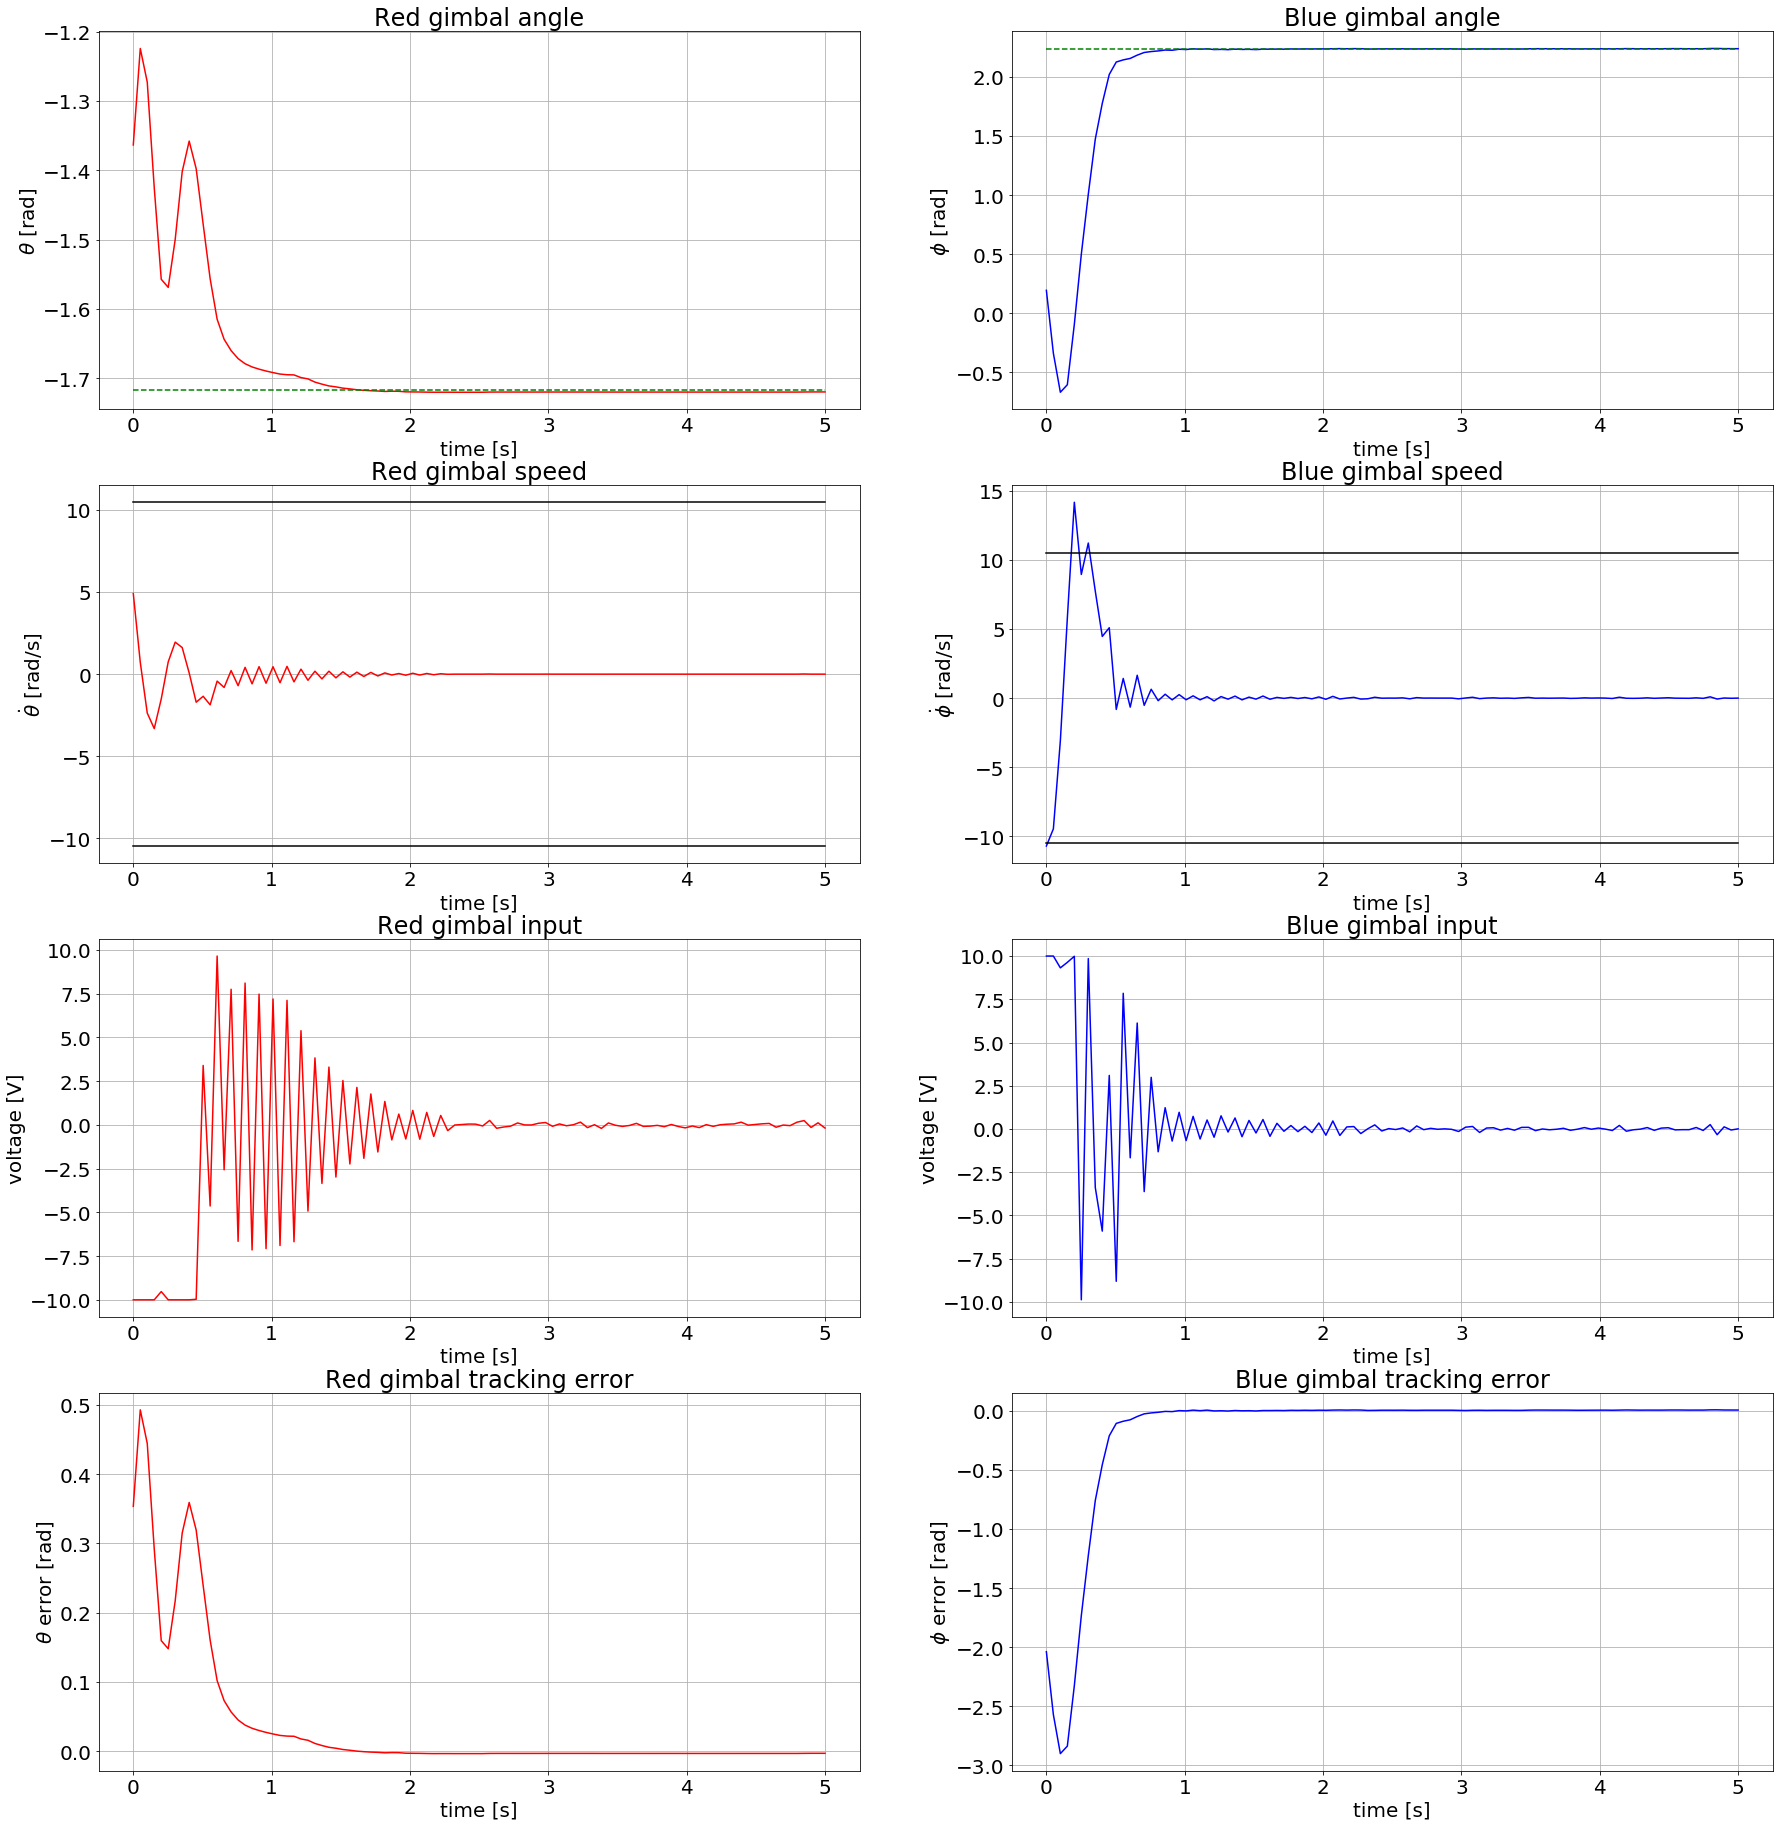

In [4]:
# Test paramaters
env_name = 'GyroscopeRobustEnv-v0'
# Initialization args
simu_args = {
    'dt': 0.05,
    'ep_len': 100,
    'seed': 2,
    'obs_noise': 0.001
}
reward_func = 'PE'
reward_args = {
    'qx1': 1, 
    'qx2': 0.2, 
    'qx3': 1, 
    'qx4': 0.2, 
    'pu1': 0.1, 
    'pu2': 0.1,
    'p': 0.1,
    'e': 40
}
# init_state = np.array([0,0,0,0,45/180*np.pi,-60/180*np.pi,200/60*2*np.pi])
env = create_env(env_name,simu_args,reward_func,reward_args,state=None)
# env.reset()
print(env.state)

# agent_paths = ['iter0_base','iter0_reward01','iter0_reward02','iter0_reward03',
#               'iter0_rs01','iter0_rs02','iter0_gamma01','iter0_gamma02','iter0_gamma03',
#               'iter0_polyak01','iter0_polyak02','iter0_polyak03','iter0_lr01','iter0_lr02',
#               'iter0_bs01','iter0_bs02','iter0_ss01','iter0_ss02','iter0_noise01','iter0_noise02']

agent_paths = ['baseline_not_robust','baseline_robust','reward_01','reward_02','reward_03','reward_04']

agent = load_agent(agent_paths[0])
t_end = 5

score, state_record, obs_record, action_record, reward_record = test_agent(env,agent,t_end)
plot_test(state_record, action_record, t_end, 4)

In [5]:
state_record[-1]

array([-1.71979275e+00, -2.29118934e-04,  2.23862595e+00,  2.99940447e-06,
       -1.71686780e+00,  2.23222589e+00, -2.14089528e+01])

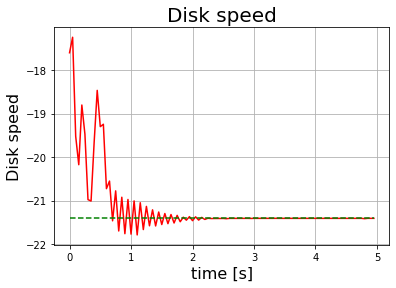

In [6]:
time = np.arange(0, 5, env.dt)

plt.title('Disk speed',fontsize=20)
plt.xlabel('time [s]',fontsize=16)
plt.ylabel('Disk speed',fontsize=16)
plt.grid()
plt.plot(time,state_record[:,-1],'r-')
plt.plot(time,np.full(len(time),env.w_ref), 'g--')

## Evaluate control performance

In [7]:
# iter0_metrics = pd.read_csv('iter0_metrics.csv')
# pd.set_option('display.max_columns', None)
# iter0_metrics

In [20]:
# d1 = pd.read_csv('NRonNR.csv')
# d2 = pd.read_csv('RonNR.csv')
# d3 = pd.read_csv('FLonNR.csv')
# d4 = pd.read_csv('NRonR.csv')
# d5 = pd.read_csv('RonR.csv')
# d6 = pd.read_csv('FLonR.csv')
# d = pd.concat([d1, d2.iloc[:,1], d3.iloc[:,1], d4.iloc[:,1], d5.iloc[:,1], d6.iloc[:,1]], axis=1)
# d.to_csv('RandNR.csv',index=False)
d = pd.read_csv('RandNR.csv')
d = d.round(4)
print(d.to_latex(escape=False,index=False))

\begin{tabular}{lrrrrrr}
\toprule
                 Unnamed: 0 &  NR on NR &  R on NR &  FL on NR &  NR on R &   R on R &   FL on R \\
\midrule
         $\theta$ MAE (rad) &    0.0878 &   0.1068 &    0.1232 &   0.0930 &   0.1085 &    0.1529 \\
           $\phi$ MAE (rad) &    0.0646 &   0.0928 &    0.1150 &   0.0704 &   0.0998 &    0.2878 \\
        $\theta$ MSSE (rad) &    0.0120 &   0.0256 &    0.0000 &   0.0135 &   0.0260 &    0.0191 \\
          $\phi$ MSSE (rad) &    0.0100 &   0.0285 &    0.0000 &   0.0126 &   0.0331 &    0.1322 \\
     $\theta$ in bounds (%) &   99.9600 &  99.3500 &  100.0000 &  99.8750 &  99.3125 &  100.0000 \\
       $\phi$ in bounds (%) &   99.9900 &  98.4500 &  100.0000 &  99.3750 &  98.8750 &   86.5625 \\
      $\theta$ unsteady (%) &    0.0000 &   0.0300 &    0.0000 &   0.0625 &   0.1250 &    0.0000 \\
        $\phi$ unsteady (%) &    0.0000 &   1.2600 &    0.0000 &   0.6250 &   0.6875 &    0.0000 \\
     $\theta$ rise time (s) &    0.4857 &   0.4876 &    1